In [2]:
import pandas as pd

df = pd.read_csv("MH_precrocessed_dataset.csv") 
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Hillside,105 Community Hub,3,h,781500,S,YPA,2017-09-23,18.0,3037,...,2,2,666,139,1970,Brimbank City Council,-37.70161,144.753300,Western Metropolitan,5556
1,Brighton East,2/13 Tatong Rd,3,h,1056532,S,Marshall,2016-05-07,10.7,3187,...,2,2,196,115,2009,Bayside City Council,-37.93020,145.029000,Southern Metropolitan,6938
2,Glen Iris,43 Albion Rd,4,h,1997500,S,Marshall,2018-02-17,7.3,3146,...,2,2,621,216,1945,Boroondara City Council,-37.86544,145.067390,Southern Metropolitan,10412
3,Oak Park,74a Winifred St,3,u,600000,SP,Brad,2016-08-13,11.5,3046,...,1,2,581,139,1970,Moreland City Council,-37.71667,144.913682,Northern Metropolitan,2651
4,Beaumaris,17A Towers St,4,h,1140000,S,Hodges,2017-10-14,17.3,3193,...,2,2,790,171,1995,Bayside City Council,-37.97501,145.052570,Southern Metropolitan,5366


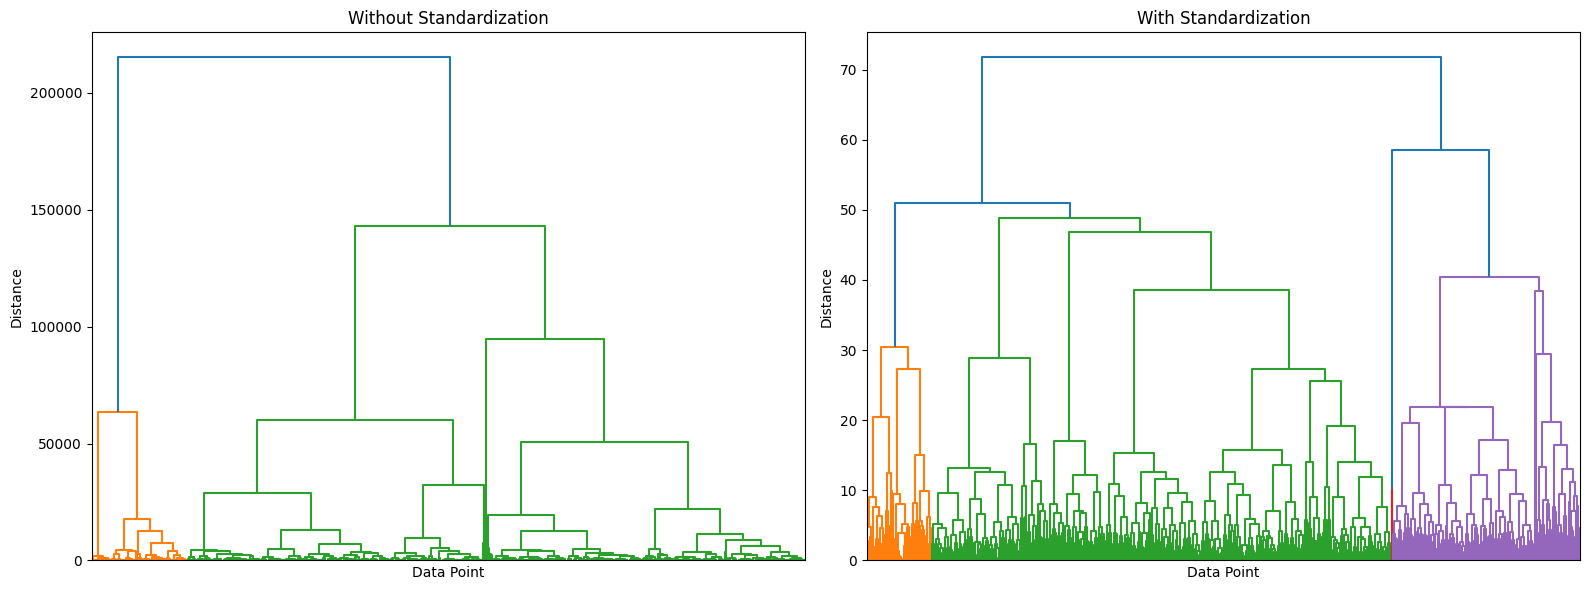

In [24]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

# Select only numerical features, excluding the target variable 'Price' 
# and 'Postcode' since it's a categorical location label, not a meaningful numerical feature.
X_numeric = df.drop(columns=['Price', 'Postcode']).select_dtypes(include=['float64', 'int64'])

# 1. Without Standardization
linked_no_scaling = linkage(X_numeric, method='ward')

# 2. With Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)
linked_scaled = linkage(X_scaled, method='ward')

plt.figure(figsize=(16, 6))

# Left: No Standardization
plt.subplot(1, 2, 1)
dendrogram(linked_no_scaling, no_labels=True)
plt.title("Without Standardization")
plt.xlabel("Data Point")
plt.ylabel("Distance")

# Right: With Standardization
plt.subplot(1, 2, 2)
dendrogram(linked_scaled, no_labels=True)
plt.title("With Standardization")
plt.xlabel("Data Point")
plt.ylabel("Distance")

plt.tight_layout()
plt.show()


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

X_numeric = df.drop(columns=['Price', 'Postcode']).select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

linked = linkage(X_scaled, method='ward')

# Assigning clusters to the data (e.g., 3 clusters)
n_clusters = 3
df['Cluster'] = fcluster(linked, n_clusters, criterion='maxclust')

# Calculating the mean values of each cluster for the selected numeric columns
cluster_summary = df.drop(columns=['Price', 'Postcode']).groupby('Cluster').mean(numeric_only=True)

# Printing the summary of each cluster's average features
print("🔍 Average characteristics of each cluster:")
print(cluster_summary)


🔍 Average characteristics of each cluster:
            Rooms   Distance  Bedroom2  Bathroom       Car      Landsize  \
Cluster                                                                    
1        2.692726  11.214004  2.800136  1.278722  1.700884    550.957852   
2        3.333333  33.500000  3.333333  2.000000  4.333333  39312.333333   
3        4.076046  11.216920  3.933460  2.140684  2.058935    595.365019   

         BuildingArea    YearBuilt  Lattitude  Longtitude  Propertycount  
Cluster                                                                   
1          125.702243  1965.342624 -37.807155  144.992298    7823.066621  
2          184.333333  1976.666667 -37.609163  144.684613    2861.333333  
3          235.615970  1975.904943 -37.822490  145.031807    6903.233840  
